# Analise de influencia das variaveis no churn dos clientes

**Objetivo:** Identificar quais variáveis estão diretamente relacionadas com o churn de clientes, através de métodos como  analise de correlação, regressões múltiplas e análise de sensibilidade. 


## 0. Imports, carga e preparação de dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/churn.csv')
#profile = ProfileReport(df = df, title = 'churn_eda_report')
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod','Churn']


In [3]:
yes_no_other_columns = categorical_columns[1:12] + [categorical_columns[-3]] + [categorical_columns[-1]]
categorical_columns = list(set(categorical_columns) - set(yes_no_other_columns))
categorical_columns

['gender', 'PaymentMethod', 'Contract']

In [4]:
# Filtrando categorical_columns
categorical_columns = ['PaymentMethod', 'Contract']

In [5]:
for item in yes_no_other_columns:
    print('=='*21)
    print('{}'.format(item))
    print(df[item].unique())
    print('=='*21)

Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
PaperlessBilling
['Yes' 'No']
Churn
['No' 'Yes']


In [6]:
dict_yes_no_other = {
    'Yes'                   :  1,
    'No'                    :  0, 
    'No internet service'   :  -1,
    'No phone service'      :  -1,
}

df_categorical = df.copy()
dict_categorical_reference = {}

try:
    #Linha de execução única
    yes_no_other_columns.remove('InternetService')
except:
    print('Execute novamente os blocos anteriores')
    pass

# Casos especiais: Internet service, gender, 'PaymentMethod', 'Contract' e InternetService

# PaymentMethod, Contract
for value in categorical_columns:
    for item in df[value].unique():
        df_categorical[value + '_' + item] = df[value].apply(lambda x: 1 if x == item else 0)
    
    # Remove coluna convertida
    df_categorical.drop(columns = value,inplace=True)

# Pre tratamento de InternetService para a conversao
df_categorical[df_categorical['InternetService'] == 'No'] = 0 
print(df_categorical['InternetService'].unique())

# Convertendo InternetService
for item in df_categorical['InternetService'].unique():
    if item != 0:
        df_categorical['InternetService' + '_' + item] = df_categorical['InternetService'].apply(lambda x: 1 if x == item else 0)

df_categorical['InternetService'] = df_categorical['InternetService'].apply(lambda x: 1 if x != 0 else x)


# Gender Male 0, Female 1
df_categorical['gender'] = df['gender'].apply(lambda x: 0 if x == 'Male' else 1)

for item in yes_no_other_columns:
    df_categorical[item] =  df[item].apply(lambda x: dict_yes_no_other[x])

# Ajustando ordem e nome de colunas
df_categorical['CHURN'] = df_categorical['Churn']
df_categorical.drop(columns = 'Churn',inplace=True)
categorical_columns = df_categorical.columns.values
translate_columns = {x : x.replace(' ','_').upper() for x in categorical_columns}
df_categorical.rename(columns = translate_columns,inplace=True)
 


['DSL' 'Fiber optic' 0]


In [7]:
df_categorical.columns

Index(['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE',
       'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
       'STREAMINGTV', 'STREAMINGMOVIES', 'PAPERLESSBILLING', 'MONTHLYCHARGES',
       'TOTALCHARGES', 'PAYMENTMETHOD_ELECTRONIC_CHECK',
       'PAYMENTMETHOD_MAILED_CHECK', 'PAYMENTMETHOD_BANK_TRANSFER_(AUTOMATIC)',
       'PAYMENTMETHOD_CREDIT_CARD_(AUTOMATIC)', 'CONTRACT_MONTH-TO-MONTH',
       'CONTRACT_ONE_YEAR', 'CONTRACT_TWO_YEAR', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_FIBER_OPTIC', 'CHURN'],
      dtype='object')

In [8]:
df_categorical.sample(3)

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,PAYMENTMETHOD_ELECTRONIC_CHECK,PAYMENTMETHOD_MAILED_CHECK,PAYMENTMETHOD_BANK_TRANSFER_(AUTOMATIC),PAYMENTMETHOD_CREDIT_CARD_(AUTOMATIC),CONTRACT_MONTH-TO-MONTH,CONTRACT_ONE_YEAR,CONTRACT_TWO_YEAR,INTERNETSERVICE_DSL,INTERNETSERVICE_FIBER_OPTIC,CHURN
5437,7000-WCEVQ,1,1,0,0,20,1,1,1,0,...,0,1,0,0,1,0,0,1,0,1
1664,4829-AUOAX,1,0,0,0,46,1,1,1,0,...,0,0,1,0,1,0,0,0,1,1
5191,5982-PSMKW,1,0,1,1,23,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0


In [9]:
df_categorical.columns

Index(['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE',
       'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
       'STREAMINGTV', 'STREAMINGMOVIES', 'PAPERLESSBILLING', 'MONTHLYCHARGES',
       'TOTALCHARGES', 'PAYMENTMETHOD_ELECTRONIC_CHECK',
       'PAYMENTMETHOD_MAILED_CHECK', 'PAYMENTMETHOD_BANK_TRANSFER_(AUTOMATIC)',
       'PAYMENTMETHOD_CREDIT_CARD_(AUTOMATIC)', 'CONTRACT_MONTH-TO-MONTH',
       'CONTRACT_ONE_YEAR', 'CONTRACT_TWO_YEAR', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_FIBER_OPTIC', 'CHURN'],
      dtype='object')

Verificando os campos numericos em numericos (até então estão tipo object)

In [10]:
for item in df_categorical.columns.values:
    if item not in categorical_columns:
        print('='*30)
        try:
            df_categorical[item] = df_categorical[item].apply(lambda x: float(x))
            print('{} --> Ok'.format(item))
        except Exception as e:
            print('{} -- FALHOU'.format(item))
            print(e)
        print('='*30)

CUSTOMERID -- FALHOU
could not convert string to float: '7590-VHVEG'
GENDER --> Ok
SENIORCITIZEN --> Ok
PARTNER --> Ok
DEPENDENTS --> Ok
TENURE --> Ok
PHONESERVICE --> Ok
MULTIPLELINES --> Ok
INTERNETSERVICE --> Ok
ONLINESECURITY --> Ok
ONLINEBACKUP --> Ok
DEVICEPROTECTION --> Ok
TECHSUPPORT --> Ok
STREAMINGTV --> Ok
STREAMINGMOVIES --> Ok
PAPERLESSBILLING --> Ok
MONTHLYCHARGES --> Ok
TOTALCHARGES -- FALHOU
could not convert string to float: ' '
PAYMENTMETHOD_ELECTRONIC_CHECK --> Ok
PAYMENTMETHOD_MAILED_CHECK --> Ok
PAYMENTMETHOD_BANK_TRANSFER_(AUTOMATIC) --> Ok
PAYMENTMETHOD_CREDIT_CARD_(AUTOMATIC) --> Ok
CONTRACT_MONTH-TO-MONTH --> Ok
CONTRACT_ONE_YEAR --> Ok
CONTRACT_TWO_YEAR --> Ok
INTERNETSERVICE_DSL --> Ok
INTERNETSERVICE_FIBER_OPTIC --> Ok


In [11]:
df_categorical[df_categorical.TOTALCHARGES == ' '].TENURE.value_counts()

TENURE
0.0    5
Name: count, dtype: int64

Quando não há vencimentos o totalcharges é nulo

In [12]:
# Adaptando conversão de TotalCharges
df_categorical['TOTALCHARGES'] = df_categorical['TOTALCHARGES'].apply(lambda x: float(x) if x != ' ' else 0)


In [13]:
df_categorical.columns

Index(['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE',
       'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
       'STREAMINGTV', 'STREAMINGMOVIES', 'PAPERLESSBILLING', 'MONTHLYCHARGES',
       'TOTALCHARGES', 'PAYMENTMETHOD_ELECTRONIC_CHECK',
       'PAYMENTMETHOD_MAILED_CHECK', 'PAYMENTMETHOD_BANK_TRANSFER_(AUTOMATIC)',
       'PAYMENTMETHOD_CREDIT_CARD_(AUTOMATIC)', 'CONTRACT_MONTH-TO-MONTH',
       'CONTRACT_ONE_YEAR', 'CONTRACT_TWO_YEAR', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_FIBER_OPTIC', 'CHURN'],
      dtype='object')

### 0.2 -  Qualidade dos dados

Aqui serão realizadas algumas verificações de casos impossíveis para validar a qualidade dos dados

#### 0.2.1 Serviços de internet

In [14]:
results = []
internet_testes = ['ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'STREAMINGTV',
                     'STREAMINGMOVIES','INTERNETSERVICE_DSL','INTERNETSERVICE_FIBER_OPTIC']

for item in internet_testes:
    results.append( df_categorical[df_categorical.INTERNETSERVICE == 0][item].value_counts() )
    results.append( df_categorical[df_categorical.INTERNETSERVICE == 1][item].value_counts() )

for item in results:
    print(item)
    print('*'*15)

ONLINESECURITY
-1.0    1526
Name: count, dtype: int64
***************
ONLINESECURITY
0.0    3498
1.0    2019
Name: count, dtype: int64
***************
ONLINEBACKUP
-1.0    1526
Name: count, dtype: int64
***************
ONLINEBACKUP
0.0    3088
1.0    2429
Name: count, dtype: int64
***************
DEVICEPROTECTION
-1.0    1526
Name: count, dtype: int64
***************
DEVICEPROTECTION
0.0    3095
1.0    2422
Name: count, dtype: int64
***************
STREAMINGTV
-1.0    1526
Name: count, dtype: int64
***************
STREAMINGTV
0.0    2810
1.0    2707
Name: count, dtype: int64
***************
STREAMINGMOVIES
-1.0    1526
Name: count, dtype: int64
***************
STREAMINGMOVIES
0.0    2785
1.0    2732
Name: count, dtype: int64
***************
INTERNETSERVICE_DSL
0.0    1526
Name: count, dtype: int64
***************
INTERNETSERVICE_DSL
0.0    3096
1.0    2421
Name: count, dtype: int64
***************
INTERNETSERVICE_FIBER_OPTIC
0.0    1526
Name: count, dtype: int64
***************
INTERNE

#### Telefonia

In [15]:
results = []
internet_testes = ['MULTIPLELINES']

for item in internet_testes:
    results.append( df_categorical[df_categorical.PHONESERVICE == 0][item].value_counts() )
    results.append( df_categorical[df_categorical.PHONESERVICE == 1][item].value_counts() )

for item in results:
    print(item)
    print('*'*15)

MULTIPLELINES
-1.0    682
Name: count, dtype: int64
***************
MULTIPLELINES
0.0    3390
1.0    2971
Name: count, dtype: int64
***************


## 1. Correlações

In [1]:
a = ['a','b','c']
b = ['a','c','xs','wq']
print(set(a) | set(b))

{'b', 'a', 'wq', 'c', 'xs'}


In [17]:
def filtra_heatmap(p_value_threshold, df_corr):
    
    selected_columns = df_corr[pear_corr['CHURN'] >= p_value_threshold].index.values
    selected_columns_2 = df_corr[pear_corr['CHURN'] <= (p_value_threshold * -1)].index.values
    selected_columns = list(set(selected_columns) | set(selected_columns_2))
    print(selected_columns)
    pear_corr_selected = pear_corr[selected_columns]
    plt.figure(figsize=(16,6))
    sns.heatmap( pear_corr_selected,annot=True)


### 1.1 Linear

['CONTRACT_MONTH-TO-MONTH', 'INTERNETSERVICE_FIBER_OPTIC', 'PAYMENTMETHOD_ELECTRONIC_CHECK', 'CHURN']


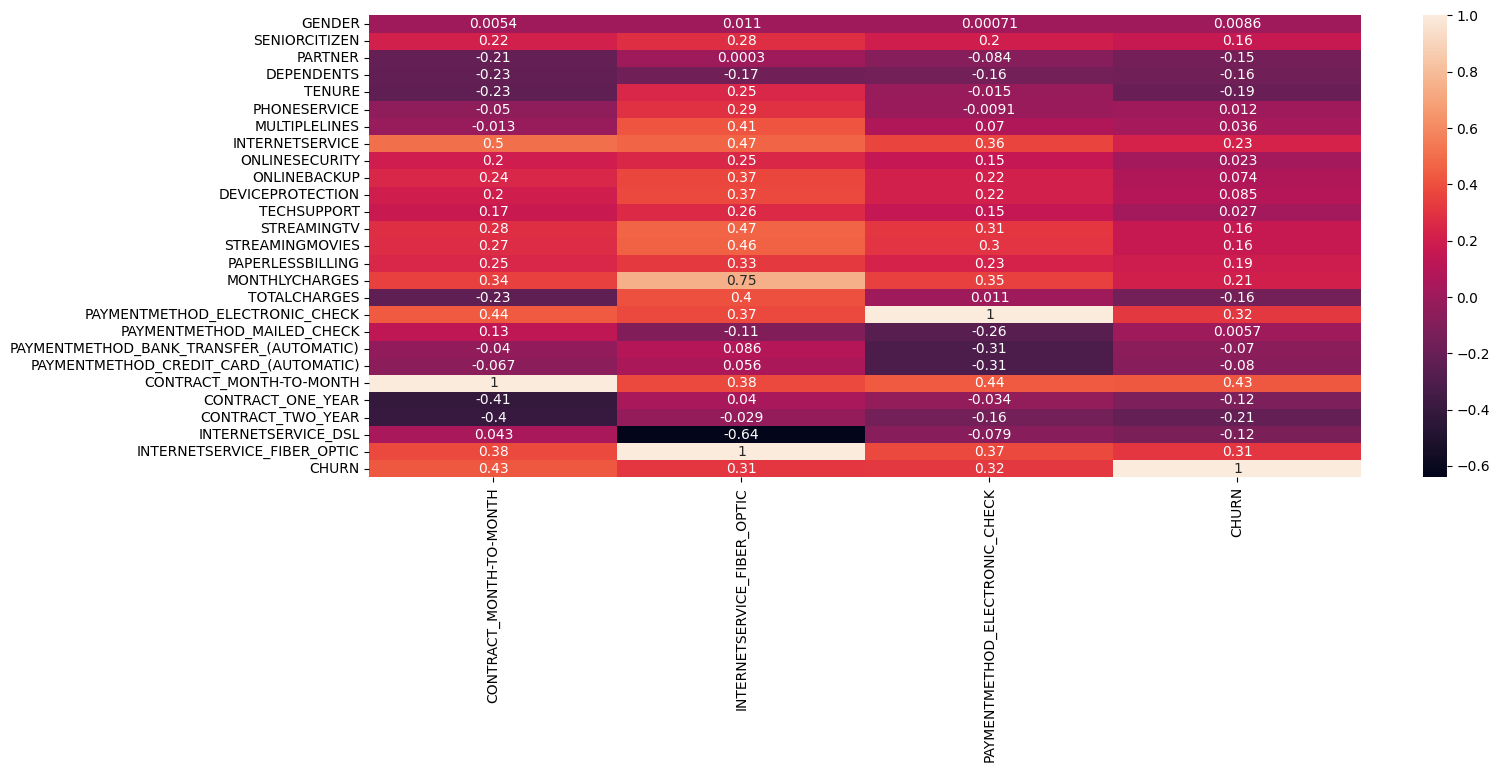

In [18]:
p_value_threshold = 0.3
pear_corr = df_categorical.iloc[:,1:].corr(method='pearson')
filtra_heatmap(p_value_threshold, df_corr=pear_corr)

### 1.2 Não Linear

['CONTRACT_MONTH-TO-MONTH', 'INTERNETSERVICE_FIBER_OPTIC', 'PAYMENTMETHOD_ELECTRONIC_CHECK', 'CHURN']


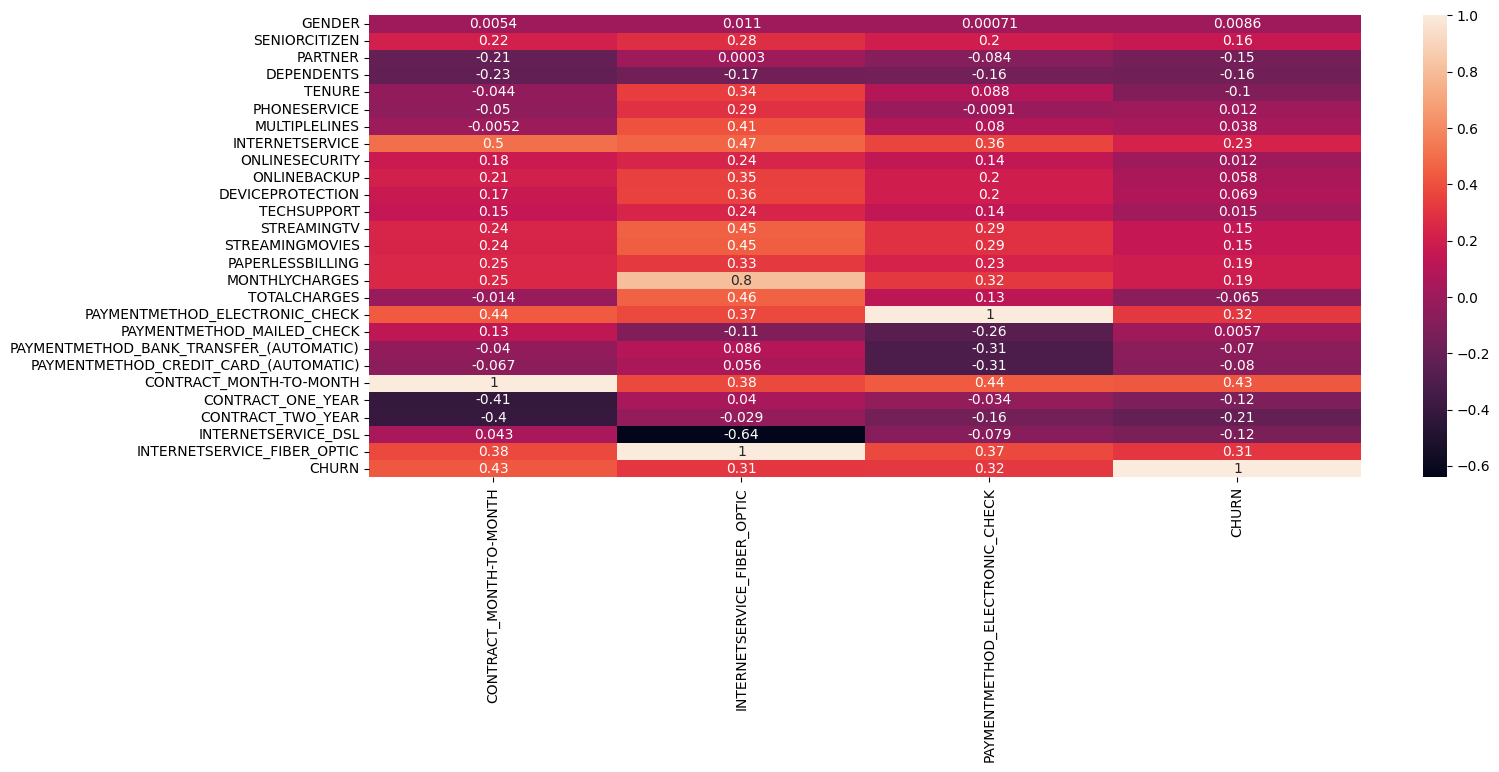

In [19]:
p_value_threshold = 0.3
pear_corr = df_categorical.iloc[:,1:].corr(method='spearman')
filtra_heatmap(p_value_threshold, df_corr=pear_corr)

**Observações:**

O contrato de pagamento mensal possui uma correlação superior ao tipo de serviço contratado, seguido pelo pagamento via electronic check e serviço de fibra

**Existe a possibilidade que apenas uma destas variáveis esteja diretamente relacionada com o churn e as demais sejam consequencias desta primeira, é necessário análises mais aprofundadas para melhores insigths**

##  Análise de relação entre 2 váriveis (suspeita vs churn)

### Método de ánalise:
1. Baseado em uma tabela conjunta apresentando as distribuições de frequências de cada variável
2. Método gráfico
3. Analisar a relação a partir do coeficiente de Tschuprov

In [119]:
def tabela_conjunta(X, Y, df):
    X_itens = df[X]
    Y_itens = df[Y]
    X_Y_itens = []
    index_tabela = X_itens.unique()
    df_tabela_conjunta = pd.DataFrame(columns = Y_itens.unique(), index=index_tabela)
    for item in Y_itens.unique():
        # NAO FUNCIONA NO CASO EM QUE DF[X][DF[Y] == ITEM] POSSUA ALGUM ITEM UNICO,
        # EXEMPLO DF[TENURE] == 0 SEJA PERTENCENTE SOMENTE AO CHURN NO OU YES, CASOS IDENTIFICADOS SOMENTE QUANDO OUTRO TIPO DE ANÁLISE É NECESSÁRIA
        df_tabela_conjunta[item] = df[X][df[Y] == item].value_counts()[index_tabela]
    
    sum_columns = df_tabela_conjunta.sum()
    sum_columns = {coluna : sum_columns[coluna] for coluna in sum_columns.index.values}

    # Total Colunas
    df_tabela_conjunta = pd.concat([df_tabela_conjunta, pd.DataFrame.from_records([sum_columns], index=['Total'])])

    # Total linhas
    df_tabela_conjunta['Total'] = df_tabela_conjunta.sum(axis=1).values
    return df_tabela_conjunta

    
conjunta = tabela_conjunta('Churn','InternetService',df)    

def normaliza_conjunta(referencia : str, tabela : pd.DataFrame) -> pd.DataFrame:
    'Referencia: Linha ou Coluna'
    tabela_normalizada = tabela.copy()

    if referencia.upper() == 'COLUNA':
        for coluna in tabela.columns:
            DEN = tabela[coluna][-1]
            tabela_normalizada[coluna] = round( tabela[coluna] * 100/DEN,2 )

    else:
        DEN = tabela['Total'].values
        for indice, linha in enumerate(tabela.index.values):
            v = round( 100*tabela.loc[linha,:]/DEN[indice],2)
            tabela_normalizada.loc[linha,:] = round( 100*tabela.loc[linha,:]/DEN[indice],2)

    return tabela_normalizada

normaliza_conjunta('linha', conjunta)


,DSL,Fiber optic,No,Total
No,37.92,34.77,27.31,100
Yes,24.56,69.40,6.05,100
Total,34.37,43.96,21.67,100


In [11]:
normaliza_conjunta('COLUNA', conjunta)


,DSL,Fiber optic,No,Total
No,81.04,58.11,92.6,73.46
Yes,18.96,41.89,7.4,26.54
Total,100.00,100.00,100.0,100.00


In [12]:
df_norm = normaliza_conjunta('colunha', conjunta)
df_norm


,DSL,Fiber optic,No,Total
No,37.92,34.77,27.31,100
Yes,24.56,69.40,6.05,100
Total,34.37,43.96,21.67,100


In [55]:
from matplotlib import pyplot as plt
import numpy as np

def plot_bar_conjunta(df_conjunta_norm, referencia : str) -> None:
    if referencia.upper() == 'COLUNA':
        x = df_conjunta_norm.columns.values
        #x = df_conjunta_norm.index.values
        y = df_conjunta_norm.iloc[:-1,:].index.values
        items = {i : df_conjunta_norm.loc[i].values for i in y}
        
    else:
        x = df_conjunta_norm.index.values
        y = df_conjunta_norm.columns.values[:-1]      
        items = {i : df_conjunta_norm[i].values for i in y}

    width = 0.6
    fig, ax = plt.subplots()
    posicao_inicio = np.zeros(len(x))
    print(items)
    for rotulo, value in items.items():
        p = ax.bar(x, value, width, label = rotulo, bottom=posicao_inicio)
        posicao_inicio += value

        
    #ax.set_title("Number of penguins with above average body mass")
    ax.legend()
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
    plt.show()

In [42]:
conjunta_metodo_pagamento = tabela_conjunta('Churn','PaymentMethod',df)    
conjunta_metodo_pagamento

,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),Total
No,1294,1304,1286,1290,5174
Yes,1071,308,258,232,1869
Total,2365,1612,1544,1522,7043


In [43]:
normaliza_conjunta('coluna',conjunta_metodo_pagamento)


,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),Total
No,54.71,80.89,83.29,84.76,73.46
Yes,45.29,19.11,16.71,15.24,26.54
Total,100.00,100.00,100.00,100.00,100.00


In [53]:
conjunta_servico_internet = tabela_conjunta('Churn','InternetService',df)
conjunta_servico_internet_norm = normaliza_conjunta('linha',conjunta_servico_internet)
conjunta_servico_internet_norm

,DSL,Fiber optic,No,Total
No,37.92,34.77,27.31,100
Yes,24.56,69.40,6.05,100
Total,34.37,43.96,21.67,100


{'DSL': array([37.92, 24.56, 34.37]), 'Fiber optic': array([34.77, 69.4 , 43.96]), 'No': array([27.31,  6.05, 21.67])}


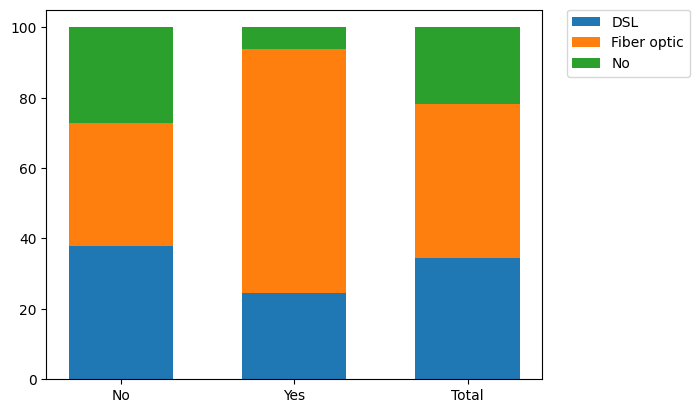

In [54]:
plot_bar_conjunta(conjunta_servico_internet_norm, referencia='linha')


**Interpretando as distribuições**


Existem duas hipoteses que podemos levantar:


1. **H1:** Independente do cliente ser conduziado ao churn ou não, a distribuição dos valores da variavel internetService é de 34,37 43,96 e 21,67 para DSL, fibra e sem serviço respectivamente

2. **H2**: Independente do serviço de internet contrato, a distribuição de churn é de 73,46% para Não e 26,54% para sim.

Dadas estas hipóteses é razoável afirmarmos que se por exemplo a variável churn não depende do serviço de internet, para cada tipo de serviço contrado, a distribuição entre clientes que realizaram churn e não é no mínimo próxima da distribuição do caso geral, ou seja 73,46 e 26,54. Aqui estamos apenas afirmando que, se a minha população tem determinado comportamente, e, a variável serviço de internet não me ajuda em nada a explicar o comportamento de churn, ou seja o churn não esta relacionado ao serviço logo, o comportamento do churn para cada serviço não irá sofrer profundas alterações, ja que a alteração do serviço contratado pela hipotese não interfere na váriável churn, logo não interfere em sua distribuição


**Para o caso em questão os gráficos geram uma suspeita de que, a variação no atributo churn interfere de maneira significativa na distribuição de frequências dos serviços de internet contratados, o que leva a conclusão de que há sim uma relação entre tais váriaveis, uma maneira de "mensurar" melhor essa relação é através do valor do coeficiente de Tschuprov**


In [154]:
def calcula_esperado(tabela_conjunta : pd.DataFrame, tabela_conjunta_normalizada : pd.DataFrame, referencia : str) -> list:
    tabela_conjunta_esperada = tabela_conjunta.copy()
    
    if referencia.upper() == 'LINHA':
        referencia_absoluto = list(tabela_conjunta['Total'].values)
        distribuicao_esperada = tabela_conjunta_normalizada.iloc[-1,:]/100
        
        for index in range(0, len(referencia_absoluto)):
            #tabela_conjunta_esperada.iloc[index, :] = round(referencia_absoluto[index] * distribuicao_esperada, 0)
            tabela_conjunta_esperada.iloc[index, :] = (referencia_absoluto[index] * distribuicao_esperada)
   
    else:
        referencia_absoluto = tabela_conjunta.iloc[-1,:].values.tolist()
        distribuicao_esperada = tabela_conjunta_normalizada['Total']/100

        for index, col in enumerate (tabela_conjunta.columns.values):
            #tabela_conjunta_esperada[col] = round( (distribuicao_esperada * referencia_absoluto[index]), 0)
            tabela_conjunta_esperada[col] = ( (distribuicao_esperada * referencia_absoluto[index]))
    return tabela_conjunta_esperada

def qui_quadrado(conjunta_referencia : pd.DataFrame, referencia : str) -> float:
    conjunta_norm = normaliza_conjunta(referencia,  conjunta_referencia)
    tabela_conjunta_esperada = calcula_esperado(conjunta_referencia, conjunta_norm, referencia)

    # Ajusta a estrutura de dados para uma lista unidimensional (1xn)
    esperado = tabela_conjunta_esperada.iloc[:-1,:-1].values.reshape(-1).tolist()
    real = conjunta_referencia.iloc[:-1,:-1].values.reshape(-1).tolist()

    result = 0
    for index in range(0,len(esperado)):
        qui_instancia = (real[index] - esperado[index])**2 / esperado[index]
        result += qui_instancia
    
    return result


def coef_tschuprov(qui_quadrado : float, df_amostra, tabela_conjunta_referencia) -> float:
    NUMERADOR = qui_quadrado/len(df_amostra)
    
    # Ultima linha e coluna referen-se a valores totais, não entram no calculo
    r = len(tabela_conjunta_referencia.iloc[:-1,:-1]) 
    c = len(tabela_conjunta_referencia.iloc[:-1].columns)
    DENOMINADOR = ( (r - 1) * (c - 1) ) ** 0.5
    tschuprov = (NUMERADOR/DENOMINADOR) ** 0.5
     
    return tschuprov



In [78]:
conjunta_servico_internet_norm_col = normaliza_conjunta(referencia= 'COLUNA', tabela=conjunta_servico_internet)
conjunta_servico_internet_norm_col

,DSL,Fiber optic,No,Total
No,81.04,58.11,92.6,73.46
Yes,18.96,41.89,7.4,26.54
Total,100.00,100.00,100.0,100.00


In [81]:
conjunta_servico_internet

,DSL,Fiber optic,No,Total
No,1962,1799,1413,5174
Yes,459,1297,113,1869
Total,2421,3096,1526,7043


In [155]:
def print_tschuprovs(referencia):
    falha = []
    for col in df.columns.values:
        try:
            conjunta = tabela_conjunta('Churn', col, df)
            qui_quadrado_ = qui_quadrado(conjunta, referencia)
            tschuprov = coef_tschuprov(qui_quadrado_, df, conjunta)
            if tschuprov > 0.2:
                print('='*30)
                print('{}'.format(col))
                print(tschuprov)
                print('='*30)
        except:
            falha.append(col)

    print('FALHAS {}' .format(falha))

print_tschuprovs('COLUNA')

InternetService
0.2450035999613388
OnlineSecurity
0.2639576802174425
OnlineBackup
0.22210371043761135
DeviceProtection
0.21394657826726135
TechSupport
0.2605505224834747
Contract
0.3116092471902436
PaymentMethod
0.2144991691704816
FALHAS ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Numericamente nenhuma das variáveis isoladamente apresentaram uma "forte" relação com o Churn, com leve destaque para Contract, OlineSecurity e TechSupport**

In [163]:
print_tschuprovs('LINHA')

InternetService
0.24500514283720667
OnlineSecurity
0.2639535482735015
OnlineBackup
0.22210982819461741
DeviceProtection
0.21395112189365564
TechSupport
0.2605565756818616
Contract
0.31161489602716713
PaymentMethod
0.21450661565547113
FALHAS ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


## 2. Modelo preditivo

## 3. Análise de sensibilidade/ Fator de risco